In [107]:
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from pandas.tseries.offsets import BDay
import calendar


from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import re
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

import datetime as dt
from datetime import datetime, date, timedelta

In [8]:
df = pd.read_csv('RetailforSinclairandiHeartMedia_modified_2020-9-13_1548.csv')

In [9]:
df.head

<bound method NDFrame.head of     Month  Year        group    retail rev
0       1  2018  iHeartMedia  9.012394e+05
1       1  2017  iHeartMedia  1.804279e+05
2       1  2019  iHeartMedia  1.676195e+06
3       2  2016  iHeartMedia  0.000000e+00
4       2  2017  iHeartMedia  1.678485e+05
5       2  2019  iHeartMedia  1.922439e+06
6       2  2018  iHeartMedia  1.030913e+06
7       3  2018  iHeartMedia  1.463166e+06
8       3  2017  iHeartMedia  2.197341e+05
9       3  2016  iHeartMedia  0.000000e+00
10      3  2019  iHeartMedia  2.020409e+06
11      4  2017  iHeartMedia  3.372801e+05
12      4  2018  iHeartMedia  1.664617e+06
13      4  2016  iHeartMedia  0.000000e+00
14      4  2019  iHeartMedia  4.280632e+06
15      5  2018  iHeartMedia  1.879564e+06
16      5  2017  iHeartMedia  6.047638e+05
17      5  2019  iHeartMedia  5.878018e+06
18      5  2016  iHeartMedia  0.000000e+00
19      6  2017  iHeartMedia  5.998345e+05
20      6  2016  iHeartMedia  2.834756e+03
21      6  2018  iHeartM

In [10]:
df.sort_values(by=['Year', 'Month'], inplace=True)

In [11]:
df

,Month,Year,group,retail rev
3,2,2016,iHeartMedia,0.000000e+00
9,3,2016,iHeartMedia,0.000000e+00
13,4,2016,iHeartMedia,0.000000e+00
18,5,2016,iHeartMedia,0.000000e+00
20,6,2016,iHeartMedia,2.834756e+03
24,7,2016,iHeartMedia,1.869804e+04
28,8,2016,iHeartMedia,5.204167e+04
32,9,2016,iHeartMedia,4.679035e+04
37,10,2016,iHeartMedia,1.150318e+05
39,11,2016,iHeartMedia,1.563632e+05


In [12]:
df = df[(df.T != 0).any()]

In [24]:
histdata = df[4:]
histdata.head()


,Month,Year,group,retail rev
20,6,2016,iHeartMedia,2834.75553
24,7,2016,iHeartMedia,18698.04184
28,8,2016,iHeartMedia,52041.67404
32,9,2016,iHeartMedia,46790.35414
37,10,2016,iHeartMedia,115031.83590


In [25]:
date_index = pd.date_range('2016-6', periods=43, freq='M')
date_index

DatetimeIndex(['2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
               '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

In [29]:
df2 = pd.DataFrame(histdata, index = date_index)

In [34]:
histdata.reindex(date_index)
histdata

,Month,Year,group,retail rev
20,6,2016,iHeartMedia,2.834756e+03
24,7,2016,iHeartMedia,1.869804e+04
28,8,2016,iHeartMedia,5.204167e+04
32,9,2016,iHeartMedia,4.679035e+04
37,10,2016,iHeartMedia,1.150318e+05
39,11,2016,iHeartMedia,1.563632e+05
44,12,2016,iHeartMedia,1.619102e+05
1,1,2017,iHeartMedia,1.804279e+05
4,2,2017,iHeartMedia,1.678485e+05
8,3,2017,iHeartMedia,2.197341e+05


In [36]:
df3

,Month,Year,group,retail rev
0,6,2016,iHeartMedia,2.834756e+03
1,7,2016,iHeartMedia,1.869804e+04
2,8,2016,iHeartMedia,5.204167e+04
3,9,2016,iHeartMedia,4.679035e+04
4,10,2016,iHeartMedia,1.150318e+05
5,11,2016,iHeartMedia,1.563632e+05
6,12,2016,iHeartMedia,1.619102e+05
7,1,2017,iHeartMedia,1.804279e+05
8,2,2017,iHeartMedia,1.678485e+05
9,3,2017,iHeartMedia,2.197341e+05


In [38]:
df3 =  histdata.set_index(date_index)

In [39]:
df3

,Month,Year,group,retail rev
2016-06-30,6,2016,iHeartMedia,2.834756e+03
2016-07-31,7,2016,iHeartMedia,1.869804e+04
2016-08-31,8,2016,iHeartMedia,5.204167e+04
2016-09-30,9,2016,iHeartMedia,4.679035e+04
2016-10-31,10,2016,iHeartMedia,1.150318e+05
2016-11-30,11,2016,iHeartMedia,1.563632e+05
2016-12-31,12,2016,iHeartMedia,1.619102e+05
2017-01-31,1,2017,iHeartMedia,1.804279e+05
2017-02-28,2,2017,iHeartMedia,1.678485e+05
2017-03-31,3,2017,iHeartMedia,2.197341e+05


In [41]:
df3['date'] = df3.index

In [42]:
df3

,Month,Year,group,retail rev,date
2016-06-30,6,2016,iHeartMedia,2.834756e+03,2016-06-30
2016-07-31,7,2016,iHeartMedia,1.869804e+04,2016-07-31
2016-08-31,8,2016,iHeartMedia,5.204167e+04,2016-08-31
2016-09-30,9,2016,iHeartMedia,4.679035e+04,2016-09-30
2016-10-31,10,2016,iHeartMedia,1.150318e+05,2016-10-31
2016-11-30,11,2016,iHeartMedia,1.563632e+05,2016-11-30
2016-12-31,12,2016,iHeartMedia,1.619102e+05,2016-12-31
2017-01-31,1,2017,iHeartMedia,1.804279e+05,2017-01-31
2017-02-28,2,2017,iHeartMedia,1.678485e+05,2017-02-28
2017-03-31,3,2017,iHeartMedia,2.197341e+05,2017-03-31


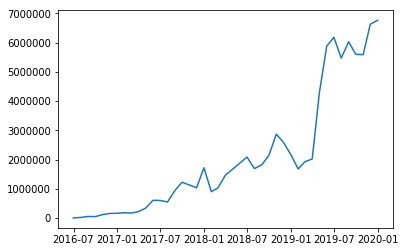

In [45]:
plt.plot(df3['date'],df3['retail rev'],scalex=True, scaley=True)
plt.show()

In [52]:
train, test = time_order_div_length[0:len(time_order_div_length)-num], time_order_div_length[len(time_order_div_length)-num:]   # train autoregression
model = AR(train)
# AR example
# fit model
model = AR(df3['retail rev'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df3)-3, len(df3)-3)
print(yhat)

2019-10-31    5.910019e+06
Freq: M, dtype: float64


In [164]:
num = 12

predicted=6189707.365824, expected=5586792.023000
predicted=6491117.522648, expected=6625987.593000
predicted=6165339.177216, expected=6763346.882000


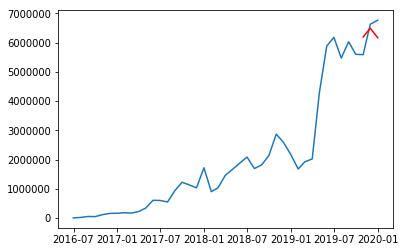

2019-12-31    6.165339e+06
2019-11-30    6.491118e+06
2019-10-31    6.189707e+06
Freq: -1M, dtype: float64


In [154]:
temp1 = []
train, test = df3['retail rev'][0:len(df3)-num], df3['retail rev'][len(df3)-num:]   # train autoregression
model = AR(train)
# here we can use ARMA or AR or MA or ARIMA models we think are appropraite
model_fit = model.fit() 
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
temp1.append(( model_fit.k_ar, num, error, df3['retail rev'][-1]))
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (0.01 + predictions[i], test[i]))
error = mean_squared_error(test, predictions)
# plot results
pyplot.plot(df3['retail rev'])
pyplot.plot(predictions, color='red')
pyplot.show()
forecast = predictions[::-1]
print(forecast)

In [172]:
temp1

[(10, 3, 246436688023.5187, 6763346.882)]

predicted=5274701.299741, expected=5586792.023000
predicted=5105770.323062, expected=6625987.593000
predicted=4944970.626575, expected=6763346.882000


/Users/kenneth/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


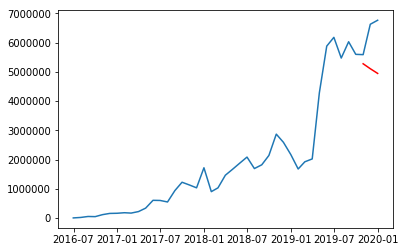

2019-12-31    4.944971e+06
2019-11-30    5.105770e+06
2019-10-31    5.274701e+06
Freq: -1M, dtype: float64


In [174]:
temp1 = []
train, test = df3['retail rev'][0:len(df3)-3], df3['retail rev'][len(df3)-3:]   # train autoregression
model = ARMA(train, order = (1,1))
# here we can use ARMA or AR or MA or ARIMA models we think are appropraite
model_fit = model.fit() 
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
temp1.append(( model_fit.k_ar, num, error, df3['retail rev'][-1]))
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (0.01 + predictions[i], test[i]))
error = mean_squared_error(test, predictions)
# plot results
pyplot.plot(df3['retail rev'])
pyplot.plot(predictions, color='red')
pyplot.show()
forecast = predictions[::-1]
print(forecast)

predicted=2148099.872168, expected=1676195.054000
predicted=2095172.278482, expected=1922438.602000
predicted=2047304.747953, expected=2020408.771000
predicted=2001345.290297, expected=4280631.905000
predicted=1957456.056155, expected=5878018.483000
predicted=1915523.761456, expected=6178954.480000
predicted=1875462.843580, expected=5470270.925000
predicted=1837189.642594, expected=6027529.889000
predicted=1800624.393798, expected=5596992.382000
predicted=1765690.878329, expected=5586792.023000
predicted=1732316.279769, expected=6625987.593000
predicted=1700431.031051, expected=6763346.882000


/Users/kenneth/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


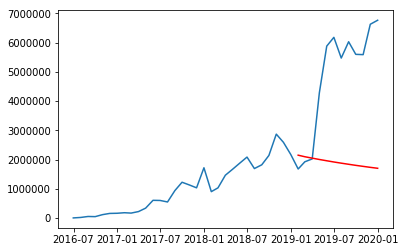

2019-12-31    1.700431e+06
2019-11-30    1.732316e+06
2019-10-31    1.765691e+06
2019-09-30    1.800624e+06
2019-08-31    1.837190e+06
2019-07-31    1.875463e+06
2019-06-30    1.915524e+06
2019-05-31    1.957456e+06
2019-04-30    2.001345e+06
2019-03-31    2.047305e+06
2019-02-28    2.095172e+06
2019-01-31    2.148100e+06
Freq: -1M, dtype: float64


In [122]:
temp1 = []
train, test = df3['retail rev'][0:len(df3)-num], df3['retail rev'][len(df3)-num:]   # train autoregression
model = ARMA(train, order = (2,0))
# here we can use ARMA or AR or MA or ARIMA models we think are appropraite
model_fit = model.fit() 
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
temp1.append(( model_fit.k_ar, num, error, df3['retail rev'][-1]))
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (0.01 + predictions[i], test[i]))
error = mean_squared_error(test, predictions)
# plot results
pyplot.plot(df3['retail rev'])
pyplot.plot(predictions, color='red')
pyplot.show()
forecast = predictions[::-1]
print(forecast)

predicted=905651.755268, expected=1676195.054000
predicted=-46246.360398, expected=1922438.602000
predicted=-456036.321302, expected=2020408.771000
predicted=-10498.003821, expected=4280631.905000
predicted=291689.116426, expected=5878018.483000
predicted=8731.425481, expected=6178954.480000
predicted=-161935.181042, expected=5470270.925000
predicted=-4222.721497, expected=6027529.889000
predicted=102133.487100, expected=5596992.382000
predicted=9604.330533, expected=5586792.023000
predicted=-54031.523653, expected=6625987.593000
predicted=-951.152575, expected=6763346.882000


/Users/kenneth/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


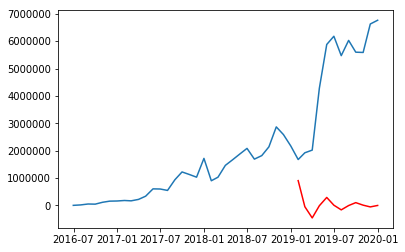

2019-12-31      -951.162575
2019-11-30    -54031.533653
2019-10-31      9604.320533
2019-09-30    102133.477100
2019-08-31     -4222.731497
2019-07-31   -161935.191042
2019-06-30      8731.415481
2019-05-31    291689.106426
2019-04-30    -10498.013821
2019-03-31   -456036.331302
2019-02-28    -46246.370398
2019-01-31    905651.745268
Freq: -1M, dtype: float64


In [117]:
temp1 = []
train, test = df3['retail rev'][0:len(df3)-num], df3['retail rev'][len(df3)-num:]   # train autoregression
model = ARIMA(train, order = (3,2,1))
# here we can use ARMA or AR or MA or ARIMA models we think are appropraite
model_fit = model.fit() 
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
error = mean_squared_error(test, predictions)
temp1.append(( model_fit.k_ar, num, error, df3['retail rev'][-1]))
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (0.01 + predictions[i], test[i]))
error = mean_squared_error(test, predictions)
# plot results
pyplot.plot(df3['retail rev'])
pyplot.plot(predictions, color='red')
pyplot.show()
forecast = predictions[::-1]
print(forecast)

/Users/kenneth/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


predicted=5586792.033000, expected=6625987.593000
predicted=5586792.033000, expected=6763346.882000


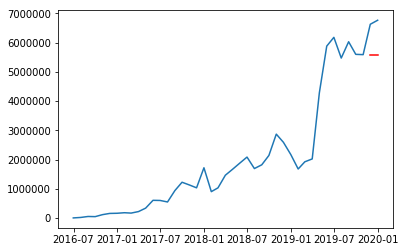

2019-12-31    5586792.023
2019-11-30    5586792.023
Freq: -1M, dtype: float64


In [176]:
temp1 = []
train, test = df3['retail rev'][0:len(df3)-2], df3['retail rev'][len(df3)-2:]   # train autoregression
model = SimpleExpSmoothing(train)
# here we can use ARMA or AR or MA or ARIMA models we think are appropraite
model_fit = model.fit() 
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
error = mean_squared_error(test, predictions)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (0.01 + predictions[i], test[i]))
error = mean_squared_error(test, predictions)
# plot results
pyplot.plot(df3['retail rev'])
pyplot.plot(predictions, color='red')
pyplot.show()
forecast = predictions[::-1]
print(forecast)

predicted=2270656.037604, expected=1676195.054000
predicted=2270656.037604, expected=1922438.602000
predicted=2270656.037604, expected=2020408.771000
predicted=2270656.037604, expected=4280631.905000
predicted=2270656.037604, expected=5878018.483000
predicted=2270656.037604, expected=6178954.480000
predicted=2270656.037604, expected=5470270.925000
predicted=2270656.037604, expected=6027529.889000
predicted=2270656.037604, expected=5596992.382000
predicted=2270656.037604, expected=5586792.023000
predicted=2270656.037604, expected=6625987.593000
predicted=2270656.037604, expected=6763346.882000


/Users/kenneth/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


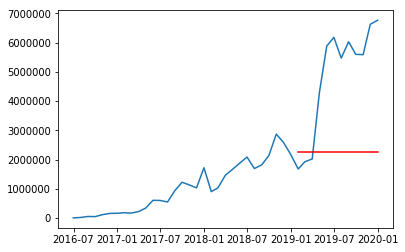

2019-12-31    2.270656e+06
2019-11-30    2.270656e+06
2019-10-31    2.270656e+06
2019-09-30    2.270656e+06
2019-08-31    2.270656e+06
2019-07-31    2.270656e+06
2019-06-30    2.270656e+06
2019-05-31    2.270656e+06
2019-04-30    2.270656e+06
2019-03-31    2.270656e+06
2019-02-28    2.270656e+06
2019-01-31    2.270656e+06
Freq: -1M, dtype: float64


In [119]:
temp1 = []
train, test = df3['retail rev'][0:len(df3)-num], df3['retail rev'][len(df3)-num:]   # train autoregression
model = ExponentialSmoothing(train)
# here we can use ARMA or AR or MA or ARIMA models we think are appropraite
model_fit = model.fit() 
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
error = mean_squared_error(test, predictions)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (0.01 + predictions[i], test[i]))
error = mean_squared_error(test, predictions)
# plot results
pyplot.plot(df3['retail rev'])
pyplot.plot(predictions, color='red')
pyplot.show()
forecast = predictions[::-1]
print(forecast)

/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.687389 (0.064763)
NB: 0.755178 (0.042766)


/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kenneth/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kenneth/anaconda3/lib/python3.7/site-packa

SVM: 0.651025 (0.072141)


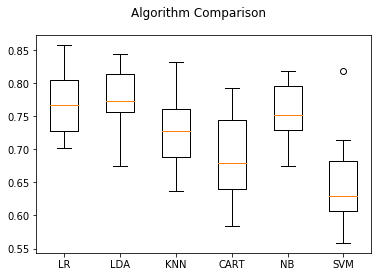

In [108]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [178]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

In [109]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [168]:
decomposition = seasonal_decompose(df3['retail rev'][:len(df3['retail rev'])-num])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

train

2016-06-30    2.834756e+03
2016-07-31    1.869804e+04
2016-08-31    5.204167e+04
2016-09-30    4.679035e+04
2016-10-31    1.150318e+05
2016-11-30    1.563632e+05
2016-12-31    1.619102e+05
2017-01-31    1.804279e+05
2017-02-28    1.678485e+05
2017-03-31    2.197341e+05
2017-04-30    3.372801e+05
2017-05-31    6.047638e+05
2017-06-30    5.998345e+05
2017-07-31    5.481914e+05
2017-08-31    9.385332e+05
2017-09-30    1.222933e+06
2017-10-31    1.129155e+06
2017-11-30    1.031999e+06
2017-12-31    1.718073e+06
2018-01-31    9.012394e+05
2018-02-28    1.030913e+06
2018-03-31    1.463166e+06
2018-04-30    1.664617e+06
2018-05-31    1.879564e+06
2018-06-30    2.083177e+06
2018-07-31    1.691024e+06
2018-08-31    1.819373e+06
2018-09-30    2.139614e+06
2018-10-31    2.868233e+06
2018-11-30    2.588506e+06
2018-12-31    2.170082e+06
2019-01-31    1.676195e+06
2019-02-28    1.922439e+06
2019-03-31    2.020409e+06
2019-04-30    4.280632e+06
2019-05-31    5.878018e+06
2019-06-30    6.178954e+06
2

In [177]:
trend

2016-06-30    0.000000e+00
2016-07-31    0.000000e+00
2016-08-31    0.000000e+00
2016-09-30    0.000000e+00
2016-10-31    0.000000e+00
2016-11-30    0.000000e+00
2016-12-31    1.968520e+05
2017-01-31    2.437892e+05
2017-02-28    3.027886e+05
2017-03-31    3.887317e+05
2017-04-30    4.799928e+05
2017-05-31    5.587327e+05
2017-06-30    6.600576e+05
2017-07-31    7.549316e+05
2017-08-31    8.209264e+05
2017-09-30    9.086970e+05
2017-10-31    1.015812e+06
2017-11-30    1.124235e+06
2017-12-31    1.239157e+06
2018-01-31    1.348581e+06
2018-02-28    1.432901e+06
2018-03-31    1.507798e+06
2018-04-30    1.618454e+06
2018-05-31    1.755771e+06
2018-06-30    1.839459e+06
2018-07-31    0.000000e+00
2018-08-31    0.000000e+00
2018-09-30    0.000000e+00
2018-10-31    0.000000e+00
2018-11-30    0.000000e+00
2018-12-31    0.000000e+00
Freq: M, Name: retail rev, dtype: float64

In [167]:
df3

,Month,Year,group,retail rev,date
2016-06-30,6,2016,iHeartMedia,2.834756e+03,2016-06-30
2016-07-31,7,2016,iHeartMedia,1.869804e+04,2016-07-31
2016-08-31,8,2016,iHeartMedia,5.204167e+04,2016-08-31
2016-09-30,9,2016,iHeartMedia,4.679035e+04,2016-09-30
2016-10-31,10,2016,iHeartMedia,1.150318e+05,2016-10-31
2016-11-30,11,2016,iHeartMedia,1.563632e+05,2016-11-30
2016-12-31,12,2016,iHeartMedia,1.619102e+05,2016-12-31
2017-01-31,1,2017,iHeartMedia,1.804279e+05,2017-01-31
2017-02-28,2,2017,iHeartMedia,1.678485e+05,2017-02-28
2017-03-31,3,2017,iHeartMedia,2.197341e+05,2017-03-31


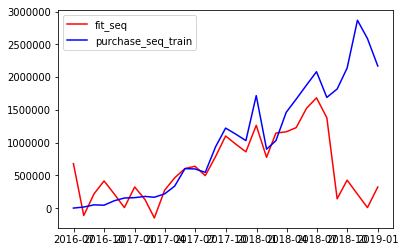

In [170]:
def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit(disp=0)

trend_model = ARIMA_Model(trend, (1, 0, 1))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start=len(trend), end=len(trend)+12, dynamic=False)

residual_model = ARIMA_Model(residual, (1, 1, 0))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start=len(trend), end=len(trend)+2, dynamic=True)

fit_seq = pd.Series(seasonal, index=seasonal.index)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(df3['retail rev'][:len(df3['retail rev'])-num], color='blue', label='purchase_seq_train')
plt.legend(loc='best')
plt.show()


In [152]:
residual_predict_seq

2019-01-31    2.572486e-12
2019-02-28    1.506862e-12
2019-03-31    1.948285e-12
2019-04-30    1.765430e-12
2019-05-31    1.841176e-12
2019-06-30    1.809799e-12
2019-07-31    1.822796e-12
2019-08-31    1.817412e-12
2019-09-30    1.819643e-12
2019-10-31    1.818719e-12
2019-11-30    1.819101e-12
2019-12-31    1.818943e-12
2020-01-31    1.819009e-12
Freq: M, dtype: float64